In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the dataset
data = pd.read_csv('winequality-red.csv')

data.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 
                'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [3]:
print(data.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [4]:
#Check for null values
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

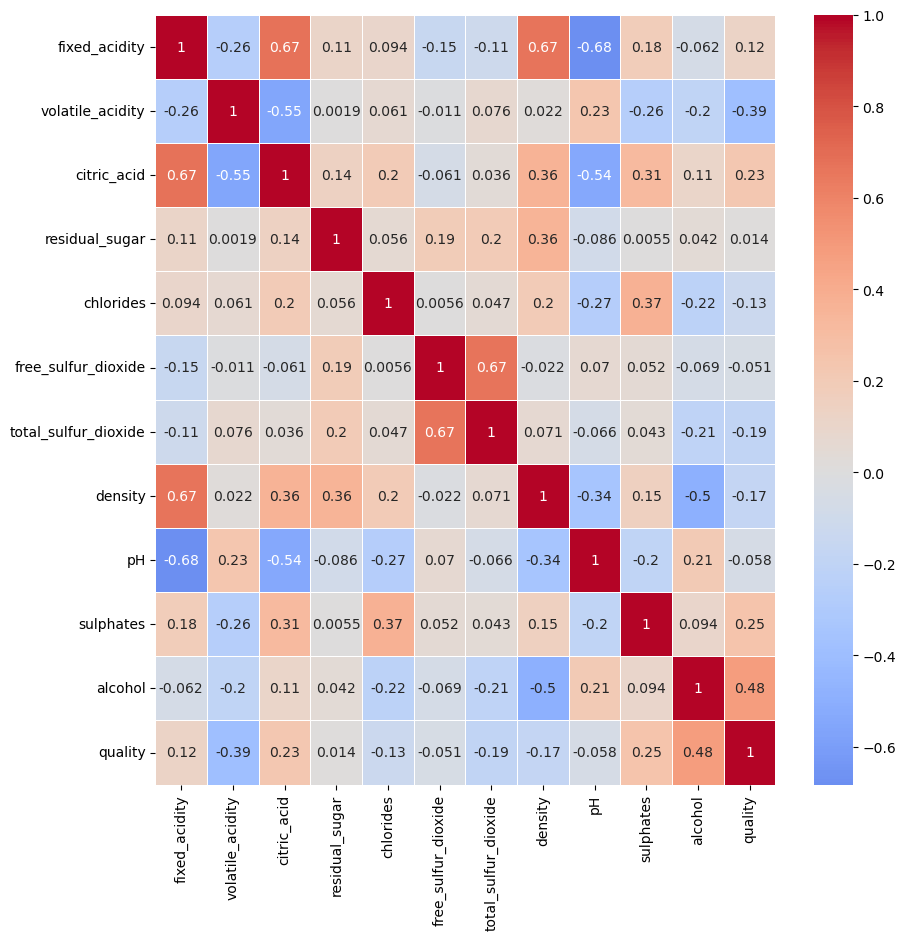

In [5]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

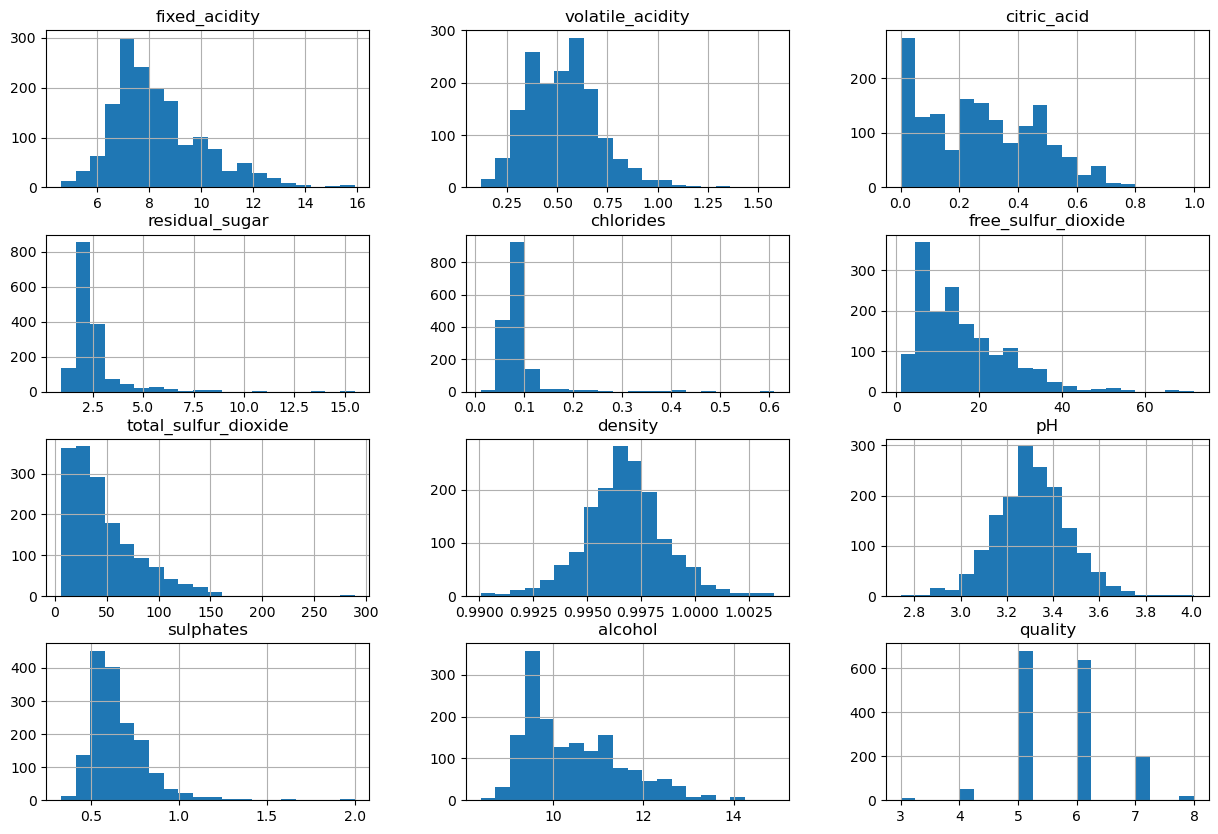

In [6]:
# Histograms for features
data.hist(bins=20, figsize=(15, 10))
plt.show()

## Nueral Nertwork using DNN

In [7]:
# Split the data into features and labels
X = data.drop('quality', axis=1)
y = data['quality']

# Convert quality labels to binary classification (e.g., good quality or not)
y = (y >= 7).astype(int)  # 1 if quality is 7 or higher, 0 otherwise

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define feature columns
feature_columns = [tf.feature_column.numeric_column(key=key) for key in X_train.columns]

# Create the DNN Classifier model
model = tf.estimator.DNNClassifier(
    hidden_units=[64, 32],  # Two hidden layers with 64 and 32 units
    feature_columns=feature_columns,
    n_classes=2,  # Binary classification (good quality or not)
)

# Input function for training
train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_train,
    y=y_train,
    batch_size=32,
    num_epochs=None,
    shuffle=True
)

# Input function for evaluation
eval_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=32,
    num_epochs=1,
    shuffle=False
)

# Train the model
model.train(input_fn=train_input_fn, steps=1000)

# Evaluate the model
eval_result = model.evaluate(input_fn=eval_input_fn)

# Print evaluation results
print("Evaluation results:")
print(eval_result)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmp7sanyemq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol':

Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:loss = 1.1416335, step = 0
INFO:tensorflow:global_step/sec: 360.1
INFO:tensorflow:loss = 0.3384657, step = 100 (0.283 sec)
INFO:tensorflow:global_step/sec: 364.594
INFO:tensorflow:loss = 0.2271434, step = 200 (0.276 sec)
INFO:tensorflow:global_step/sec: 407.321
INFO:tensorflow:loss = 0.4157745, step = 300 (0.254 sec)
INFO:tensorflow:global_step/sec: 351.699
INFO:tensorflow:loss = 0.3017407, step = 400 (0.277 sec)
INFO:tensorflow:global_step/sec: 462.574
INFO:tensorflow:loss = 0.40736985, step = 500 (0.210 sec)
INFO:tensorflow:global_step/sec: 506.49
INFO:tensorflow:loss = 0.34545583, step = 600 (0.215 sec)
INFO:tensorflow:global_step/sec: 373.235
INFO:tensorflow:loss = 0.22577451, step = 700 (0.248 sec)
INFO:tensorflow:global_step/sec: 371.976
INFO:tensorflow:loss = 0.25060344, step = 800 (0.269 sec)
INFO:tensorflow:global_step/sec: 511.25
INFO:tensorflow:loss = 0.33248544, step = 900 (0.196 sec)
INFO:tensorflow:Calling c

## Nueral Nertwork using Keras

Epoch 1/50
40/40 [==============================] - 1s 8ms/step - loss: 0.5054 - accuracy: 0.8038 - val_loss: 0.3889 - val_accuracy: 0.8531
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8671 - val_loss: 0.3171 - val_accuracy: 0.8531
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.8780 - val_loss: 0.2922 - val_accuracy: 0.8656
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2820 - accuracy: 0.8843 - val_loss: 0.2791 - val_accuracy: 0.8719
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2741 - accuracy: 0.8851 - val_loss: 0.2721 - val_accuracy: 0.8656
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2669 - accuracy: 0.8874 - val_loss: 0.2670 - val_accuracy: 0.8750
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2618 - accuracy: 0.8851 - val_loss: 0.2639 - val_accuracy: 0.8750
Epoch 8/50
40/40 [==

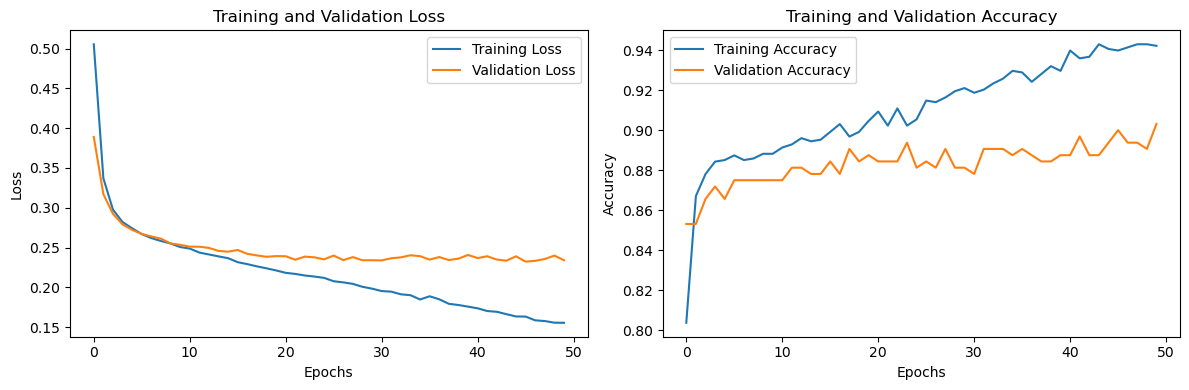

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Plot training loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

## Observations

From graph 1, As the number of epochs grows, we see a steady decrease in loss. Our model's training and validation losses both decrease with time, demonstrating that it is learning and improving its predictions. This loss decrease suggests that our neural network is effective in the training process, improving the model's performance and accuracy.

From graph 2, As the number of epochs increases, we can plainly detect a good trend. The model's ability to learn and produce increasingly accurate predictions is demonstrated by constant increases in training and validation accuracy.

It highlights that prolonged training enables the nueral network model and to make precise predictions and classify red wine quality effectively.